In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('Student_performance_data.csv')

#Dropping the ID column as it is not needed for analysis
df.drop(columns=['StudentID'], inplace=True)

display(df.head())

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [76]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 261.8 KB


None

In [77]:
#Checking for missing values in the dataset
df.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [78]:
#This code will drop any rows with missing values in the dataset
df.dropna(inplace=True)

In [79]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000
Sports,2392.0,0.303512,0.459870,0.000000,0.000000,0.000000,1.000000,1.000000


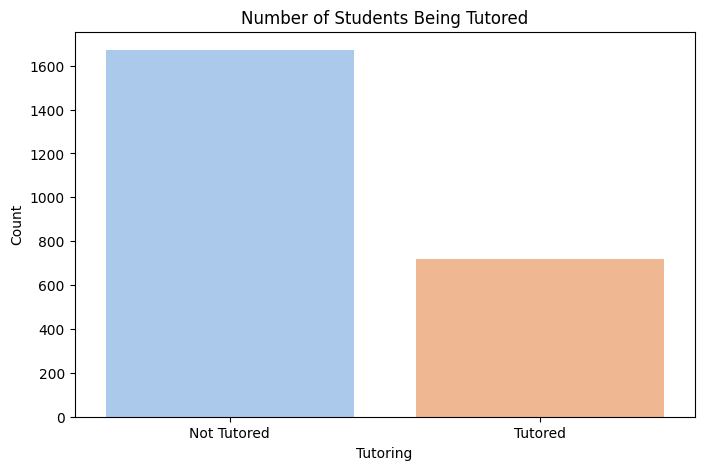

In [80]:
plt.figure(figsize=(8, 5))
tutoring_count = sns.countplot(data=df, x='Tutoring', palette='pastel', hue='Tutoring', legend=False)
tutoring_count.set_title('Number of Students Being Tutored')
tutoring_count.set_xlabel('Tutoring')
tutoring_count.set_xticks([0, 1])
tutoring_count.set_xticklabels(['Not Tutored', 'Tutored'])
tutoring_count.set_ylabel('Count')

plt.show()

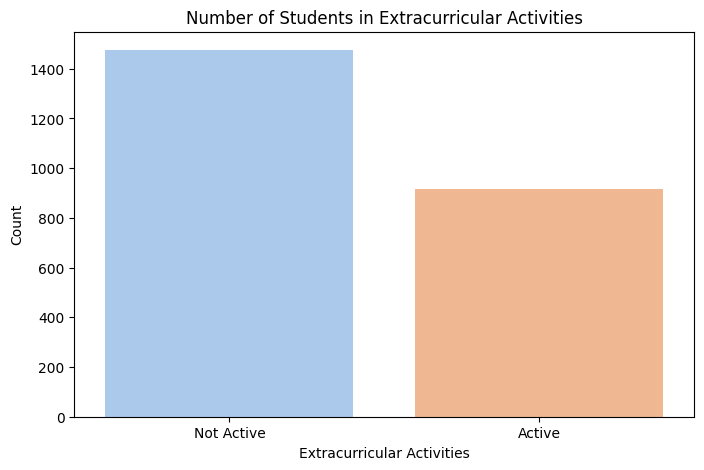

In [81]:
plt.figure(figsize=(8, 5))
extracurricular_count = sns.countplot(data=df, x='Extracurricular', palette='pastel', hue='Extracurricular', legend=False)
extracurricular_count.set_title('Number of Students in Extracurricular Activities')
extracurricular_count.set_xlabel('Extracurricular Activities') 
extracurricular_count.set_xticks([0, 1])
extracurricular_count.set_xticklabels(['Not Active', 'Active'])
extracurricular_count.set_ylabel('Count')
plt.show()

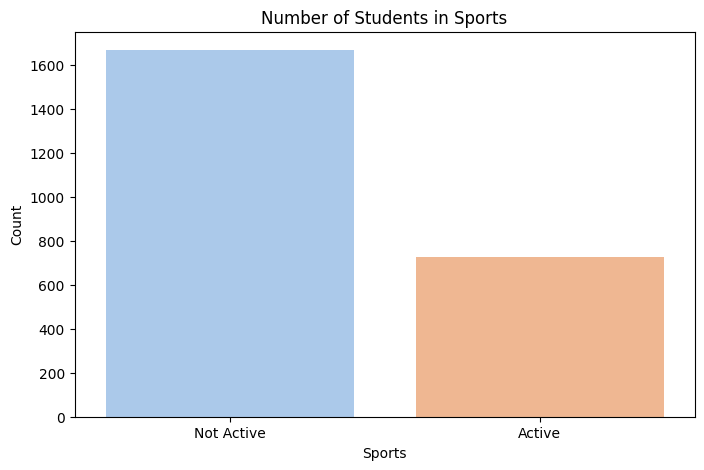

In [82]:
plt.figure(figsize=(8, 5))
sports_count = sns.countplot(data=df, x='Sports', palette='pastel', hue='Sports', legend=False)
sports_count.set_title('Number of Students in Sports')
sports_count.set_xlabel('Sports') 
sports_count.set_xticks([0, 1])
sports_count.set_xticklabels(['Not Active', 'Active'])
sports_count.set_ylabel('Count')
plt.show()

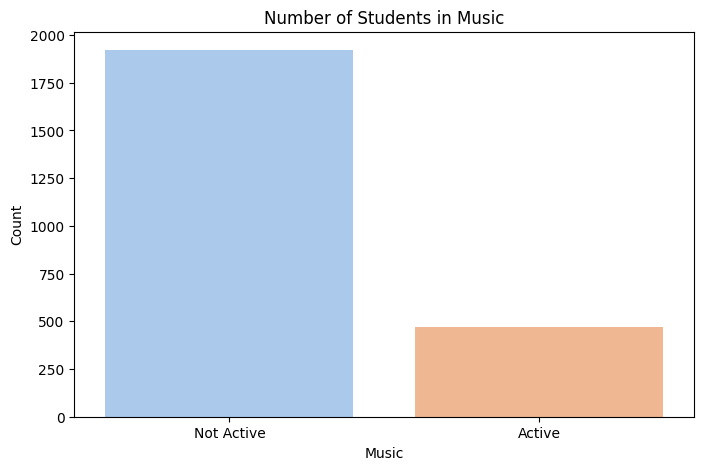

In [83]:
plt.figure(figsize=(8, 5))
music_count = sns.countplot(data=df, x='Music', palette='pastel', hue='Music', legend=False)
music_count.set_title('Number of Students in Music')
music_count.set_xlabel('Music') 
music_count.set_xticks([0, 1])
music_count.set_xticklabels(['Not Active', 'Active'])
music_count.set_ylabel('Count')
plt.show()

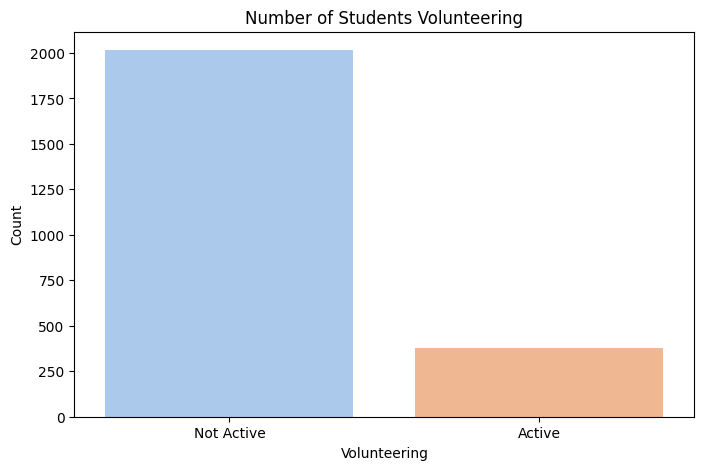

In [84]:
plt.figure(figsize=(8, 5))
volunteering_count = sns.countplot(data=df, x='Volunteering', palette='pastel', hue='Volunteering', legend=False)
volunteering_count.set_title('Number of Students Volunteering')
volunteering_count.set_xlabel('Volunteering') 
volunteering_count.set_xticks([0, 1])
volunteering_count.set_xticklabels(['Not Active', 'Active'])
volunteering_count.set_ylabel('Count')
plt.show()

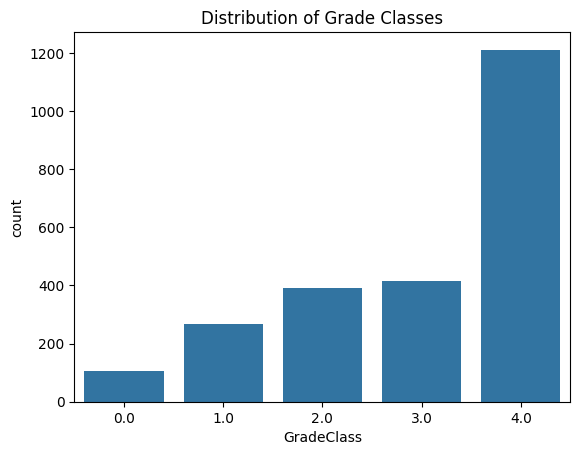

In [85]:
sns.countplot(data=df, x='GradeClass')
plt.title('Distribution of Grade Classes')
plt.show()

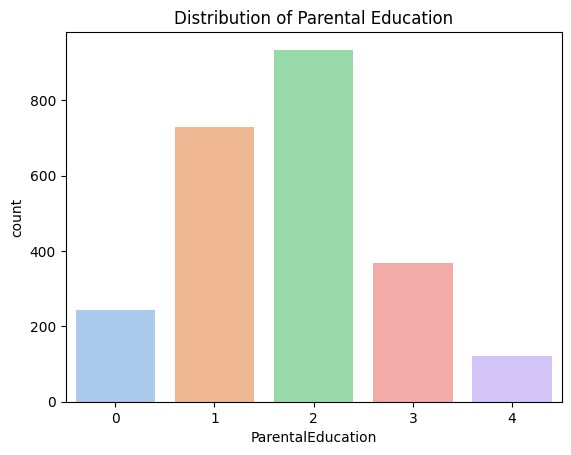

In [86]:
sns.countplot(data=df, x='ParentalEducation', palette='pastel', hue='ParentalEducation', legend=False)
plt.title('Distribution of Parental Education')
plt.show()

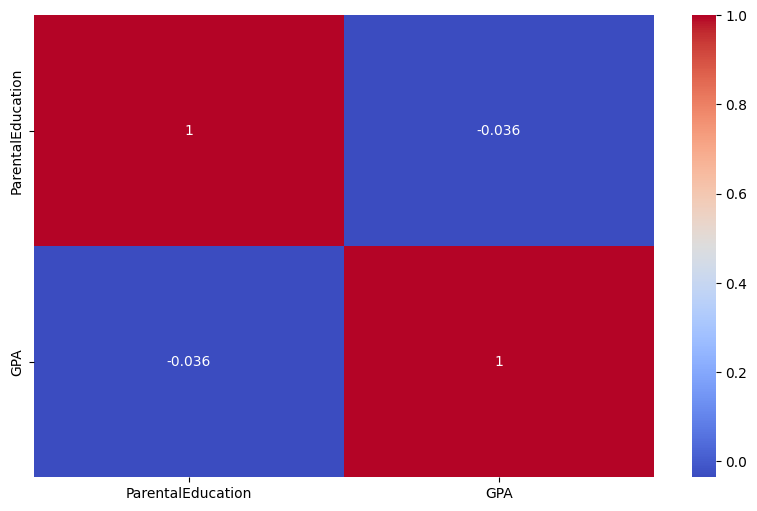

In [87]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['ParentalEducation', 'GPA']].corr(), annot=True, cmap='coolwarm')
plt.show()

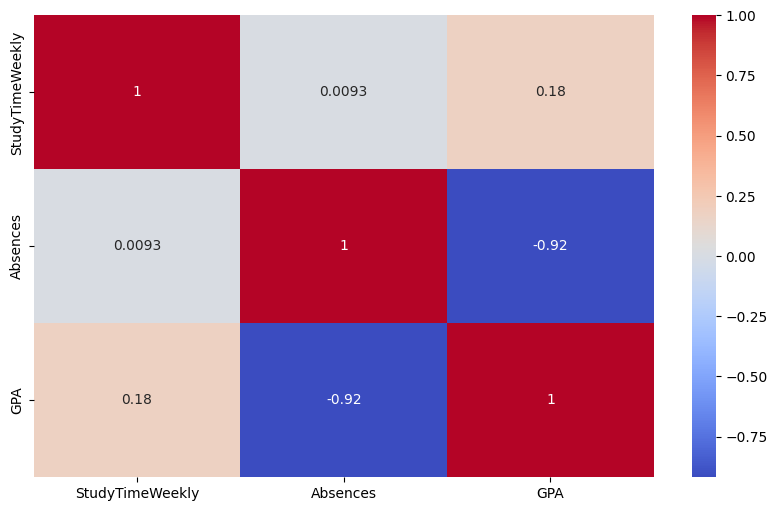

In [88]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['StudyTimeWeekly', 'Absences', 'GPA']].corr(), annot=True, cmap='coolwarm')
plt.show()

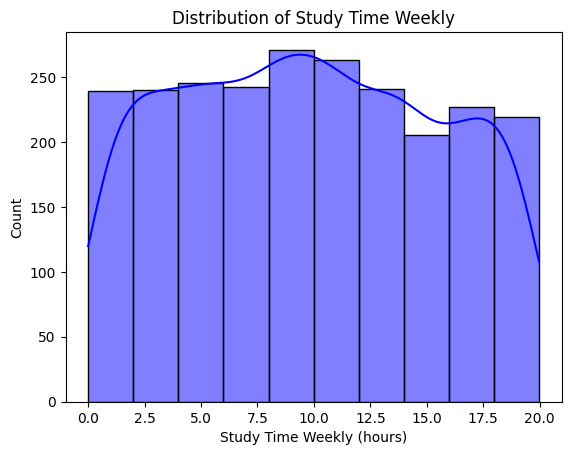

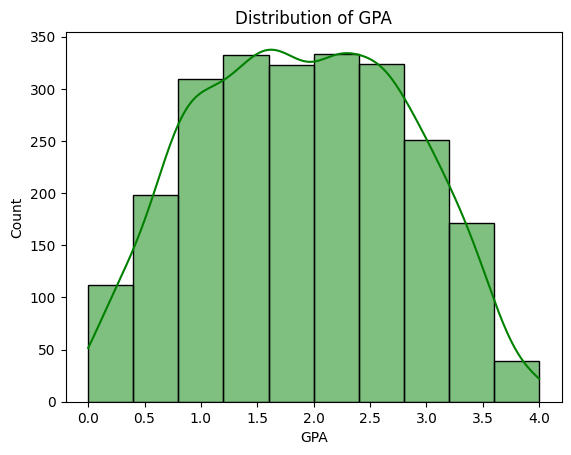

In [89]:
histplot_studyTime = sns.histplot(data=df, x='StudyTimeWeekly', bins=10, kde=True, color='blue')
histplot_studyTime.set_title('Distribution of Study Time Weekly')
histplot_studyTime.set_xlabel('Study Time Weekly (hours)')
histplot_studyTime.set_ylabel('Count')
plt.show()

histplot_GPA = sns.histplot(data=df, x='GPA', bins=10, kde=True, color='green')
histplot_GPA.set_title('Distribution of GPA')
histplot_GPA.set_xlabel('GPA')
histplot_GPA.set_ylabel('Count')
plt.show()

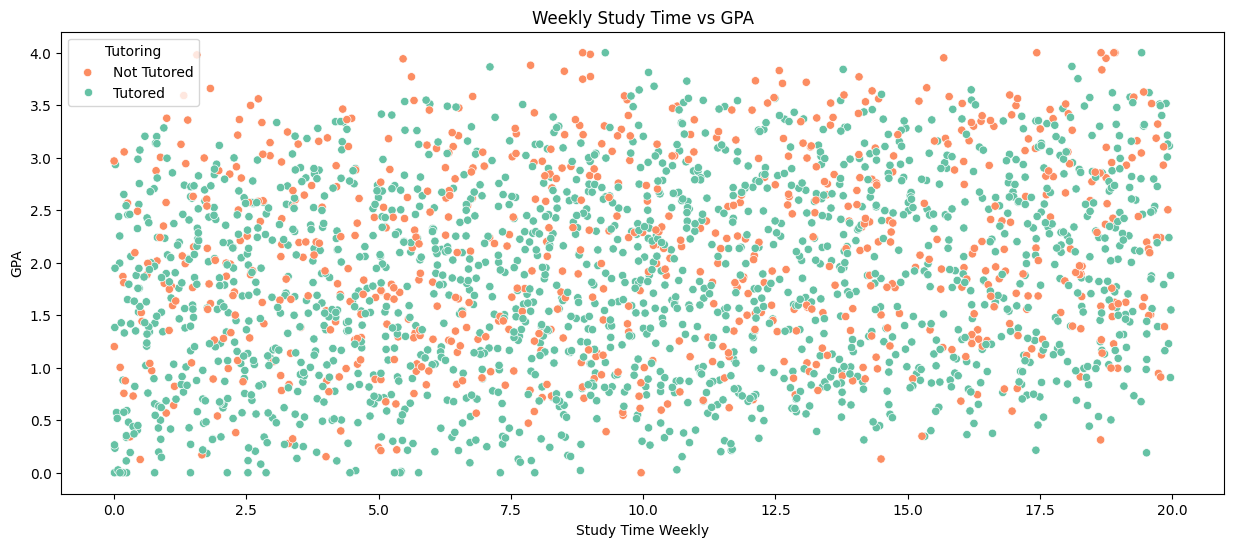

In [90]:
plt.figure(figsize=(15, 6))
weeklyStudyTime_GPA = sns.scatterplot(data=df, x='StudyTimeWeekly', y='GPA', hue='Tutoring', palette='Set2', legend='full')
weeklyStudyTime_GPA.set_title('Weekly Study Time vs GPA')
weeklyStudyTime_GPA.set_xlabel('Study Time Weekly')
weeklyStudyTime_GPA.set_ylabel('GPA')
weeklyStudyTime_GPA.legend(title='Tutoring', labels=['Not Tutored', 'Tutored'])
plt.show()

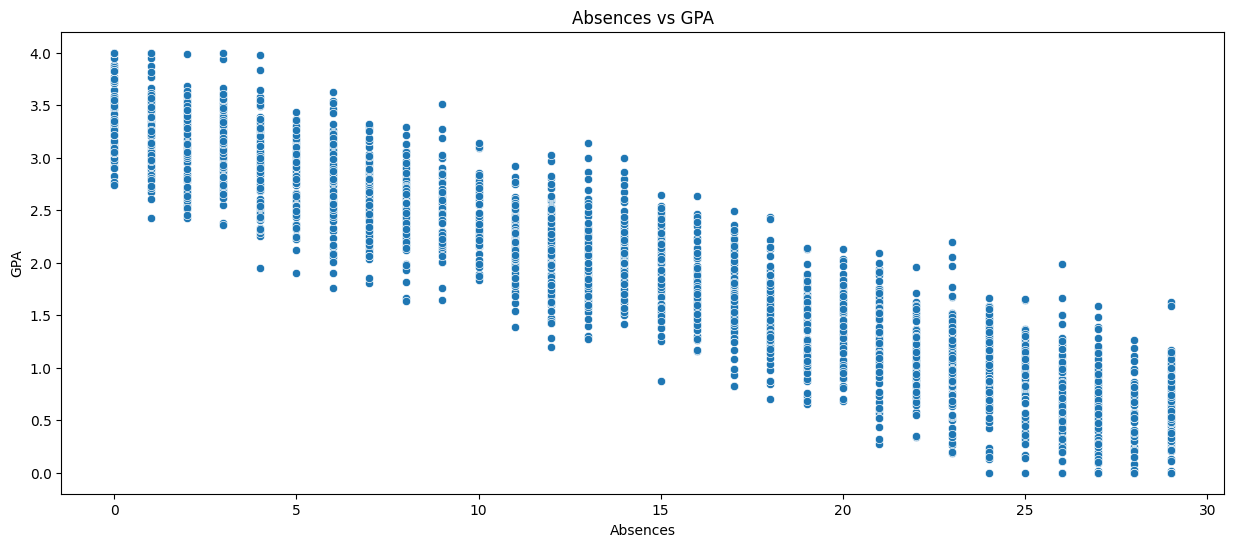

In [91]:
plt.figure(figsize=(15, 6))
Absences_GPA = sns.scatterplot(data=df, x='Absences', y='GPA')
Absences_GPA.set_title('Absences vs GPA')
Absences_GPA.set_xlabel('Absences')
Absences_GPA.set_ylabel('GPA')
plt.show()

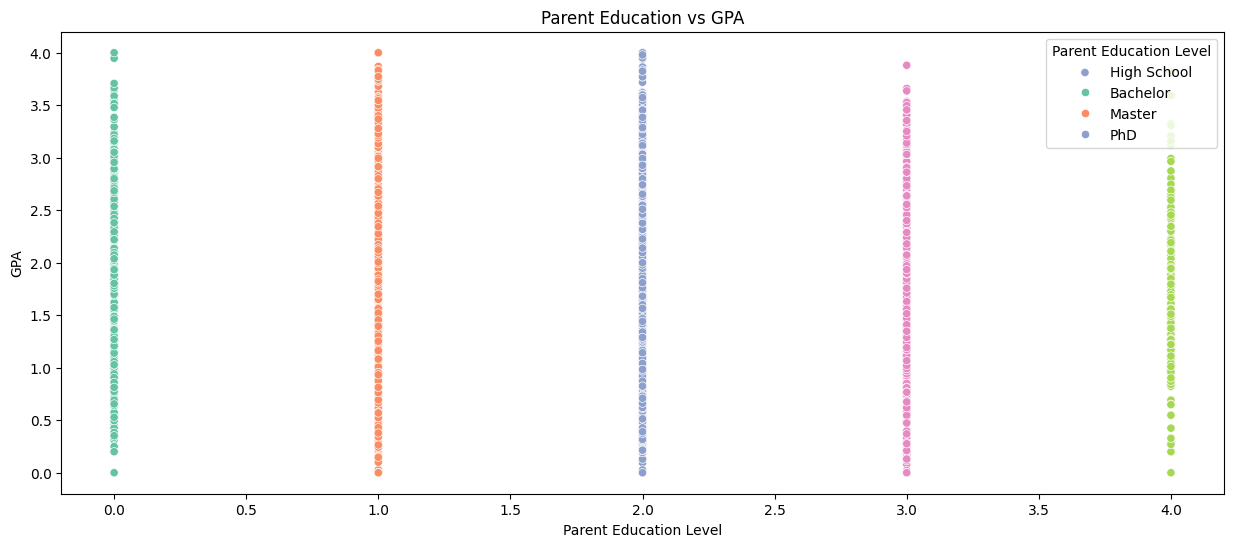

In [92]:
plt.figure(figsize=(15, 6))
parentEducation_GPA = sns.scatterplot(data=df, x='ParentalEducation', y='GPA', hue='ParentalEducation', palette='Set2', legend='full')
parentEducation_GPA.set_title('Parent Education vs GPA')
parentEducation_GPA.set_xlabel('Parent Education Level')
parentEducation_GPA.set_ylabel('GPA')
parentEducation_GPA.legend(title='Parent Education Level', labels=['High School', 'Bachelor', 'Master', 'PhD'])
plt.show()

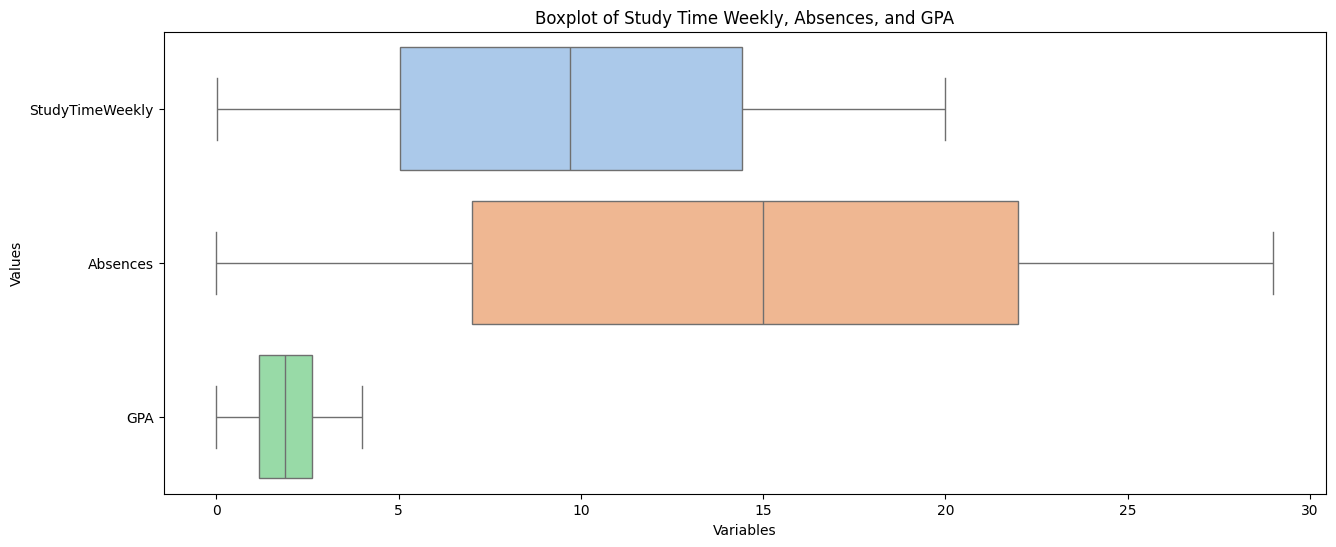

In [93]:
plt.figure(figsize=(15, 6))

boxplot_data = df[['StudyTimeWeekly', 'Absences', 'GPA']]
boxplot = sns.boxplot(data=boxplot_data, palette='pastel', orient='h')
boxplot.set_title('Boxplot of Study Time Weekly, Absences, and GPA')
boxplot.set_xlabel('Variables')
boxplot.set_ylabel('Values')

plt.show()

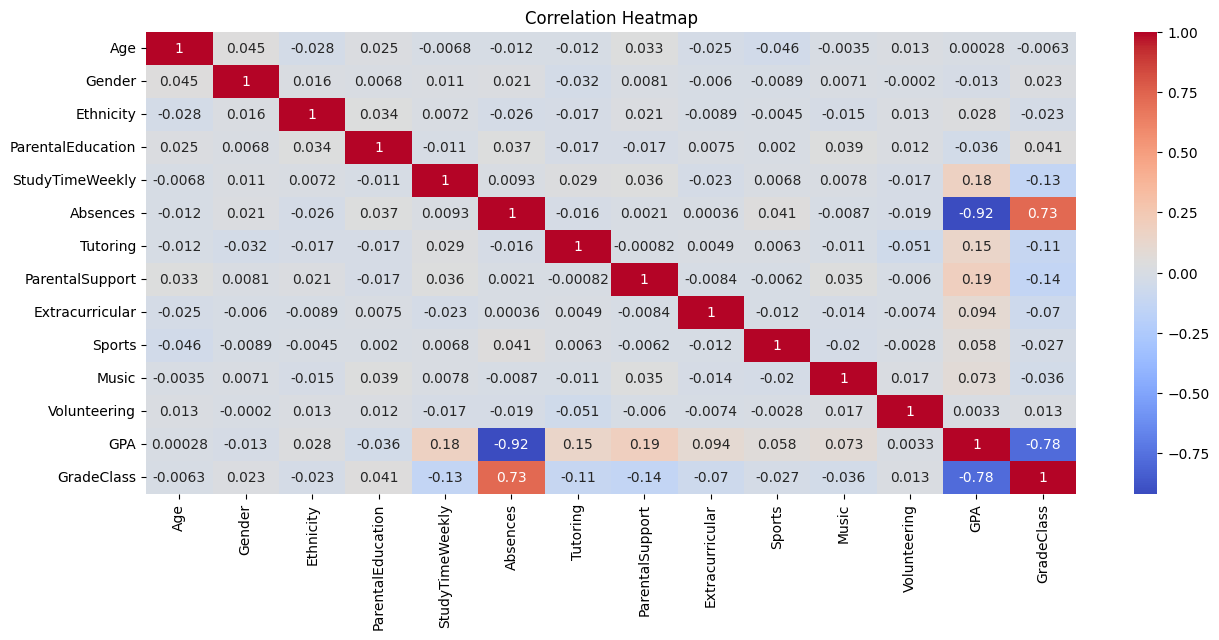

In [94]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [95]:
features = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 
            'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 
            'Sports', 'Music', 'Volunteering', 'GPA']

target = 'GradeClass'

X = df[features]
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the shapes of the resulting datasets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1913, 13), (479, 13), (1913,), (479,))